In [13]:
import os

TMAP_Directory = 'data/CBMM-R_2023_05_09/'

files = os.listdir(TMAP_Directory)

files = [file for file in files if not any(x in file for x in ('_RES','Calibration','faulty','fit_coeff','zero1'))]

import numpy as np

E_acc = np.array([np.loadtxt(TMAP_Directory+file,skiprows=3,max_rows=1,usecols=(2)) for file in files])
Qo = np.array([np.loadtxt(TMAP_Directory+file,skiprows=3,max_rows=1,usecols=(1)) for file in files])

TMAP = np.array([np.loadtxt(TMAP_Directory+file,skiprows=4) for file in files])



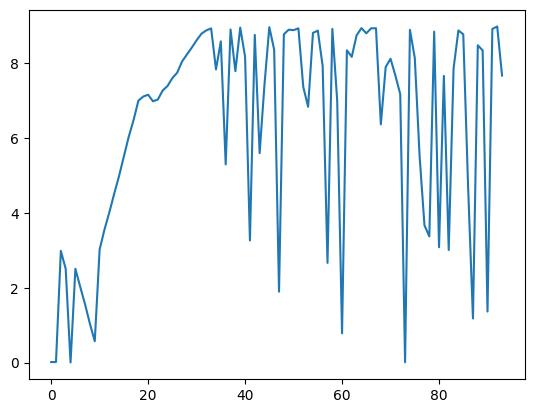

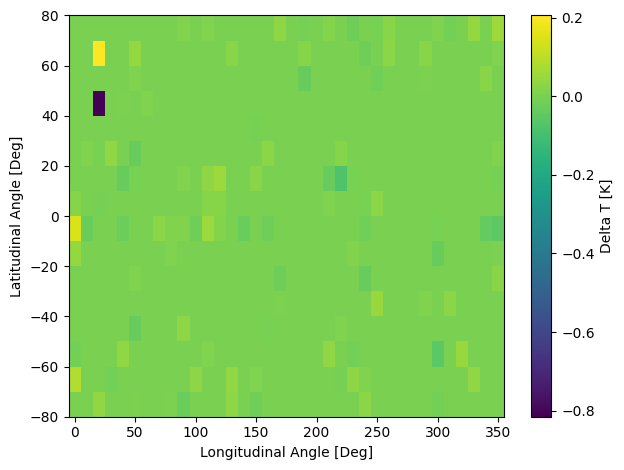

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(E_acc)

fig, axs = plt.subplots(1)

x, y = np.linspace(0,350,num=36), np.linspace(-75,75,num=16) 

X, Y = np.meshgrid(x,y)

map1 = axs.pcolormesh(X,Y,TMAP[24].T)
c = fig.colorbar(map1, ax=axs)



axs.set_xlabel('Longitudinal Angle [Deg]')
axs.set_ylabel('Latitudinal Angle [Deg]')
c.set_label('Delta T [K]')

fig.tight_layout()

(-0.2, 0.2)

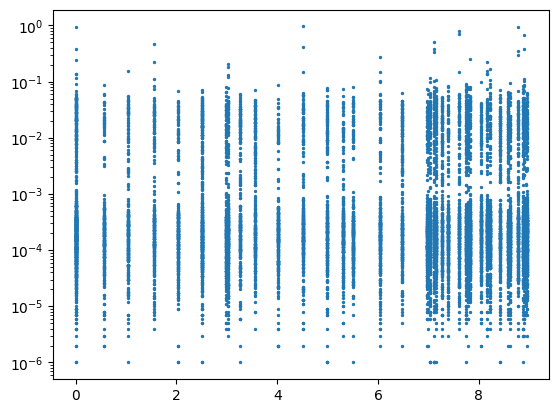

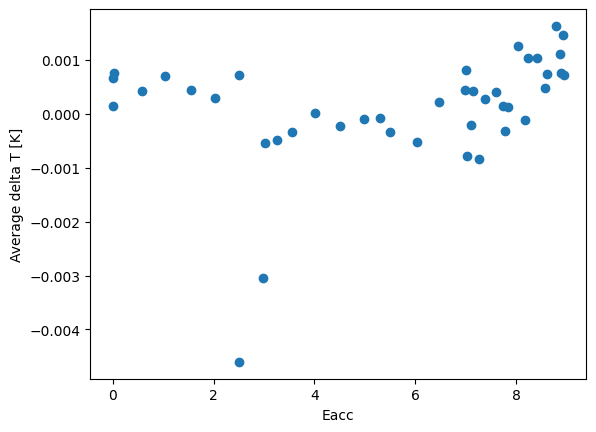

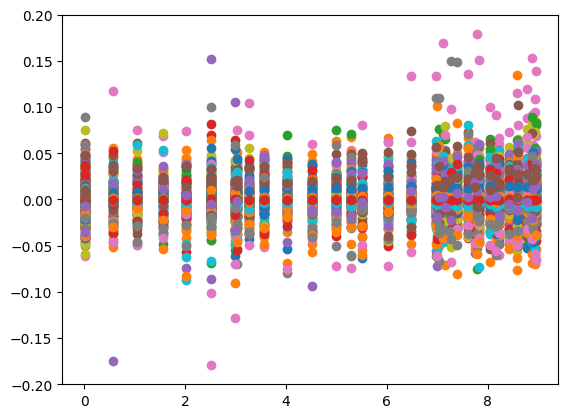

In [15]:
TMAP[:,(np.abs(TMAP[0,:,:]) > 0.05)] = 0

TMAP = TMAP[:42]
E_acc = E_acc[:42]
Qo = Qo[:42]

plt.figure
plt.scatter(np.tile(E_acc,(1,TMAP.shape[1]*TMAP.shape[2])),TMAP.reshape((TMAP.shape[0],TMAP.shape[1]*TMAP.shape[2])),s=2)

plt.yscale('log')

plt.figure()
plt.scatter(E_acc,np.mean(TMAP,axis=(1,2)))
plt.xlabel('Eacc')
plt.ylabel('Average delta T [K]')

plt.figure()
for i in range(0,TMAP.shape[1],1):
    for j in range(0,TMAP.shape[2],1):
        plt.scatter(E_acc,TMAP[:,i,j])

plt.ylim(-0.2,0.2)




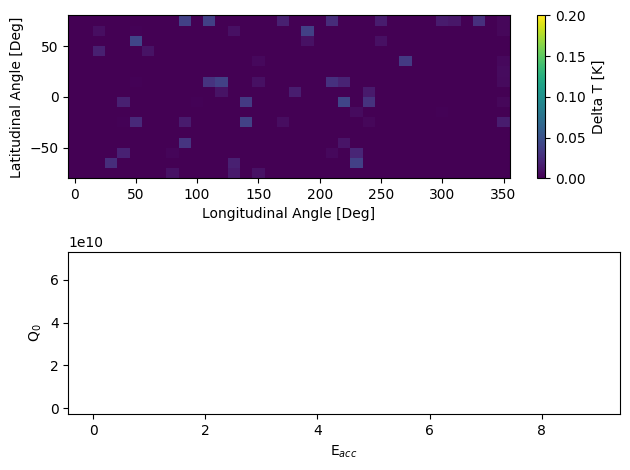

In [16]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
import matplotlib.colors as colors

fig, axs = plt.subplots(2)

#TMAP = np.clip(TMAP,1e-6,None)

map1 = axs[0].pcolormesh(X,Y,TMAP[0].T,norm=colors.Normalize(vmin=0, vmax=0.2))
c = fig.colorbar(map1, ax=axs[0])



axs[0].set_xlabel('Longitudinal Angle [Deg]')
axs[0].set_ylabel('Latitudinal Angle [Deg]')
c.set_label('Delta T [K]')

axs[1].set_xlabel('E$_{acc}$')
axs[1].set_ylabel('Q$_{0}$')

"""defects = np.array(
            ((15,8),(15,9),
           (16,8),
           (20,8),
           (21,8),(21,9),
           (25,8),
           (26,8),(26,9),
           (30,8),
           (35,9),
           (36,8))) - 1

axs[0].scatter(X.T[defects[:,0],defects[:,1]],Y.T[defects[:,0],defects[:,1]],c='r',s=5)"""

E_plot = axs[1].scatter(E_acc,Qo)


fig.tight_layout()



def update(frame):

    map1.set_array(TMAP[frame].T)
    E_plot.set_offsets(np.stack((E_acc[:frame],Qo[:frame])).T)


    return (map1,E_plot)


ani = animation.FuncAnimation(fig=fig, func=update, frames=TMAP.shape[0], interval=30)

ani.save('test.gif', writer = 'pillow', fps = 2) 

In [17]:
X.T[defects[:,0],defects[:,1]]

array([140., 140., 150., 190., 200., 200., 240., 250., 250., 290., 340.,
       350.])